<a href="https://colab.research.google.com/github/martuscellifaria/Coursera/blob/main/Lasso_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoLarsCV, LassoCV, LassoLarsIC

#2. Load dataset

In [4]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Course ML/addhealth_pds.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,11,22,65,134,135,177,205,206,207,208,346,366,523,532,533,753,755,756,842,843,847,848,849,856,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,966,967,974,979,980,982,986,987,989,991,992,994,1010,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1073,1075,1078,1079,1080,1081,1084,1085,1086,1087,1088,1091,1092,1093,1094,1095,1097,1098,1099,1119,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1184,1185,1186,1187,1190,1191,1192,1193,1194,1197,1198,1199,1200,1201,1219,1221,1222,1235,1236,1237,1238,1239,1240,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,12

# 3. Uppercase all data column names

In [5]:
data.columns = map(str.upper, data.columns)

#4. Manage the data

In [6]:
data_clean = data.dropna()
#recode1 = {1:1, 2:0}
#data_clean['MALE']= data_clean['BIO_SEX'].map(recode1)

#5. Select predictors and target

In [7]:
predvar = data_clean[['IMONTH','IDAY','BIO_SEX','MACNO','SCH_YR','SCID',
'SSCID','COMMID']]


target = data_clean.H1GH1A

#6. Standardize predictors to have mean = 0 and sd = 1

In [9]:
predictors=predvar.copy()
from sklearn import preprocessing
predictors['IMONTH']=preprocessing.scale(predictors['IMONTH'].astype('float64'))
predictors['IDAY']=preprocessing.scale(predictors['IDAY'].astype('float64'))
predictors['BIO_SEX']=preprocessing.scale(predictors['BIO_SEX'].astype('float64'))
predictors['MACNO']=preprocessing.scale(predictors['MACNO'].astype('float64'))
predictors['SCH_YR']=preprocessing.scale(predictors['SCH_YR'].astype('float64'))
predictors['SCID']=preprocessing.scale(predictors['SCID'].astype('float64'))
predictors['SSCID']=preprocessing.scale(predictors['SSCID'].astype('float64'))
predictors['COMMID']=preprocessing.scale(predictors['COMMID'].astype('float64'))

#7. Split data in training and test

In [10]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, test_size=.3, random_state=123)

#8. Specify the Lasso regression model

In [11]:
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

#9. Print variable names and regression coefficients

In [12]:
dict(zip(predictors.columns, model.coef_))

{'BIO_SEX': 0.04870447573147071,
 'COMMID': -0.016859135039731084,
 'IDAY': -0.6624130337895495,
 'IMONTH': -2.922929959180374,
 'MACNO': 0.10919739708500062,
 'SCH_YR': -0.27086893764025555,
 'SCID': -0.03442585050884522,
 'SSCID': -0.03244056861968426}

#10. Plot coefficient progression

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


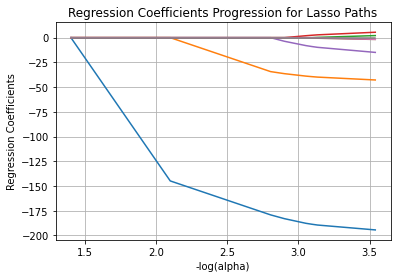

In [13]:
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')
plt.grid(which='major')
plt.grid(which='minor')

#11. Plot mean square error for each fold

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


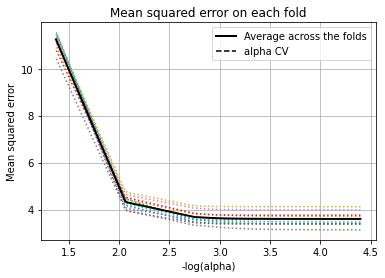

In [14]:
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.mse_path_, ':')
plt.plot(m_log_alphascv, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')
plt.grid(which='major')
plt.grid(which='minor')

#12. MSE from training and test data

In [15]:
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
3.5775925356701577
test data MSE
3.6135228837154307


#13. R-Square from training and test data

In [16]:
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.6818743314045567
test data R-square
0.683339954700142
